# 1. Install Dependencies and Setup

In [1]:
pip install protobuf==3.20.0

  Using cached protobuf-3.20.0-cp310-cp310-win_amd64.whl (903 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tensorflow==2.10.0 opencv-python matplotlib

  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install datasets


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      1.4.0
aiohttp                      3.8.5
aiosignal                    1.3.1
asttokens                    2.2.1
astunparse                   1.6.3
async-timeout                4.0.2
attrs                        23.1.0
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.5.7
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.1.0
cycler                       0.11.0
datasets                     2.14.2
debugpy                      1.6.7
decorator                    5.1.1
dill                         0.3.7
executing                    1.2.0
filelock                     3.12.2
flatbuffers                  23.5.26
fonttools                    4.40.0
frozenlist                   1.4.0
fsspec                       2023.6.0
gast                         0.4.0
go


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# Using Hugging Face
from datasets import load_dataset

dataset = load_dataset("Falah/Alzheimer_MRI")
dataset

T:\rRanderson\mie2023internship\github\newrepo\brain_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5120
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1280
    })
})

In [16]:
# Access the training and test datasets
train_dataset = dataset['train']
test_dataset = dataset['test']

# Access the images and labels from the training dataset
train_images = train_dataset['image']
train_labels = train_dataset['label']

# This would show the images
# for image in train_images:
   # image.show()
amount = len(train_images)
amount

5120

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

In [5]:
# data_dir = '../images/data'
data_dir = train_images

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [15]:
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# data = tf.keras.utils.image_dataset_from_directory('../images/data')

In [13]:
# data_iterator = data.as_numpy_iterator()

In [14]:
# batch = data_iterator.next()

In [15]:
# they give the image numbers based on folder order
# autism images are - 0
# Control Images are - 1
# Parkinson Images are - 2
# Alzheimer images are - 3

batch[1]

array([2, 0, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 3, 3, 1, 0, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 2, 3, 3, 3])

IndexError: index 4 is out of bounds for axis 0 with size 4

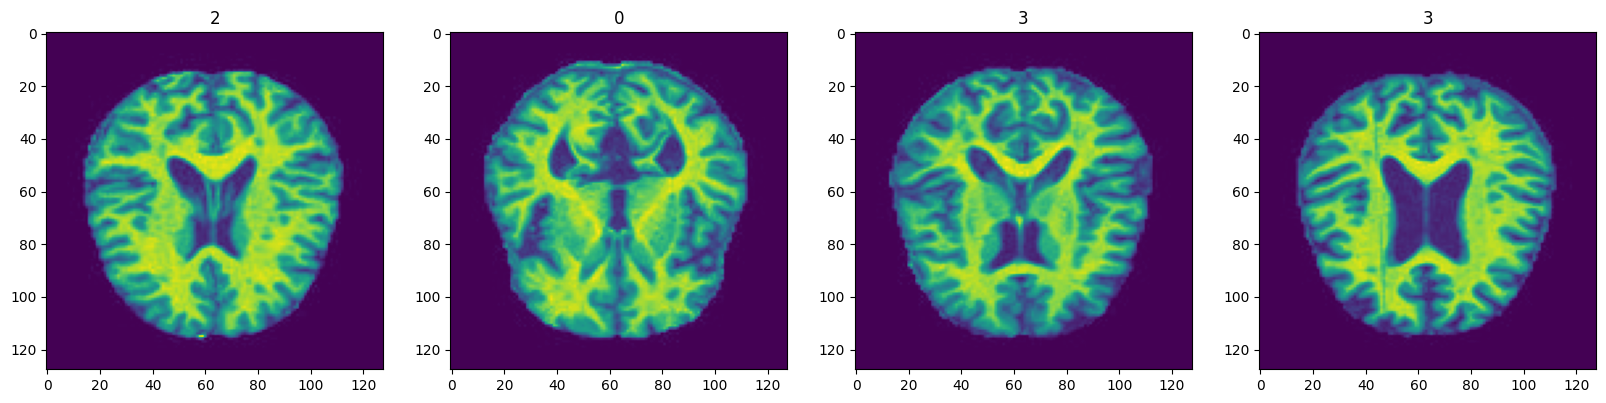

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, img in enumerate(train_images):
    ax[idx].imshow(img)
    ax[idx].set_title(train_labels[idx])  # Use 'train_labels' to set the title for each image

plt.show()

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [19]:
len(data)

64

In [20]:
# Images used to train the deep learning model
train_size = int(len(data)*.7)
# Data used to evaluate the model while training
val_size = int(len(data)*.2)+1
# Hold this data out until the end of training to test
test_size = int(len(data)*.1)+1

In [21]:
train_size+val_size+test_size

64

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 [==============================] - 6s 67ms/step - loss: 0.7890 - accuracy: 0.6364 - val_loss: 0.3801 - val_accuracy: 0.8558
Epoch 2/20
44/44 [==============================] - 3s 64ms/step - loss: 0.2174 - accuracy: 0.9176 - val_loss: 0.1610 - val_accuracy: 0.9279
Epoch 3/20
44/44 [==============================] - 3s 64ms/step - loss: 0.0682 - accuracy: 0.9751 - val_loss: 0.0458 - val_accuracy: 0.9880
Epoch 4/20
44/44 [==============================] - 3s 64ms/step - loss: 0.0171 - accuracy: 0.9979 - val_loss: 0.0701 - val_accuracy: 0.9712
Epoch 5/20
44/44 [==============================] - 3s 65ms/step - loss: 0.0094 - accuracy: 0.9993 - val_loss: 0.0231 - val_accuracy: 0.9928
Epoch 6/20
44/44 [==============================] - 3s 65ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0261 - val_accuracy: 0.9904
Epoch 7/20
44/44 [==============================] - 3s 63ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.0158 - val_accuracy: 0.9928
Epoch 8/20
44

# 8. Plot Performance

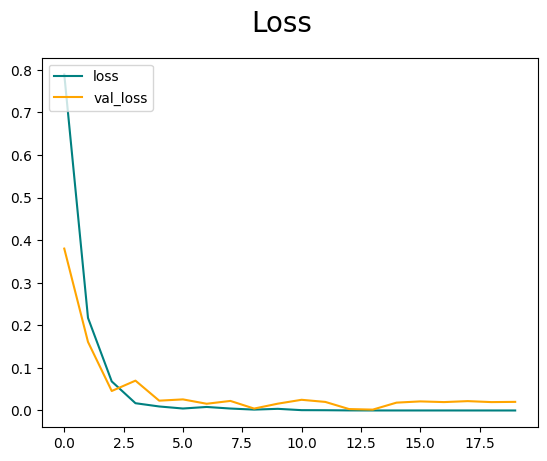

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

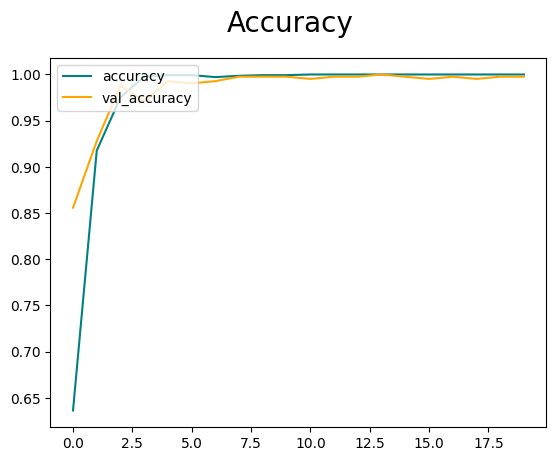

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [36]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
# I get an error once categorical is added
  #  pre.update_state(y, yhat)
# Another error, must not need
  # re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 120ms/step


In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.19689119, shape=(), dtype=float32)


# 10. Test a Whole MRI Scan

In [38]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [39]:
import cv2
from dcm_to_png import *
from rotate import *

In [40]:
# Define the classes
classes = ['control', 'autism', 'parkinson', 'alzheimer']

In [41]:
# Define the path to the folder containing the images
folder_path = '../images/test_scans/whole_scans/parkinson/3360/I498912'

In [42]:
# Convert dcm files to png images
converted_images = convert_folder_dcm_to_png(folder_path, folder_path)
if converted_images:
    print(f"Converted {len(converted_images)} DICOM images to PNG.")
else:
    print("No DICOM images converted to PNG.")

Converted 54 DICOM images to PNG.


In [43]:
# Rotate the images
rotate_images(folder_path)

Rotated: ppmicontrol_1_scan0.png
Rotated: ppmicontrol_1_scan1.png
Rotated: ppmicontrol_1_scan10.png
Rotated: ppmicontrol_1_scan11.png
Rotated: ppmicontrol_1_scan12.png
Rotated: ppmicontrol_1_scan13.png
Rotated: ppmicontrol_1_scan14.png
Rotated: ppmicontrol_1_scan15.png
Rotated: ppmicontrol_1_scan16.png
Rotated: ppmicontrol_1_scan17.png
Rotated: ppmicontrol_1_scan18.png
Rotated: ppmicontrol_1_scan19.png
Rotated: ppmicontrol_1_scan2.png
Rotated: ppmicontrol_1_scan20.png
Rotated: ppmicontrol_1_scan21.png
Rotated: ppmicontrol_1_scan22.png
Rotated: ppmicontrol_1_scan23.png
Rotated: ppmicontrol_1_scan24.png
Rotated: ppmicontrol_1_scan25.png
Rotated: ppmicontrol_1_scan26.png
Rotated: ppmicontrol_1_scan27.png
Rotated: ppmicontrol_1_scan28.png
Rotated: ppmicontrol_1_scan29.png
Rotated: ppmicontrol_1_scan3.png
Rotated: ppmicontrol_1_scan30.png
Rotated: ppmicontrol_1_scan31.png
Rotated: ppmicontrol_1_scan32.png
Rotated: ppmicontrol_1_scan33.png
Rotated: ppmicontrol_1_scan34.png
Rotated: ppmicontr

In [44]:
# Function to resize and preprocess the image
def preprocess_image(image):
    resize = tf.image.resize(image, (256, 256))
    return resize / 255

In [45]:
# Initialize counters for each class
class_counts = {c: 0 for c in classes}

In [46]:
# Scan the folder and process each image
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Read the image
        img = cv2.imread(os.path.join(folder_path, filename))
        
        # Preprocess the image
        preprocessed_img = preprocess_image(img)
        
        # Make the prediction
        yhat = model.predict(np.expand_dims(preprocessed_img, 0))
        predicted_class = np.argmax(yhat, axis=1)[0]
        
        # Get the predicted class label
        predicted_label = classes[predicted_class]
        
        # Check if the predicted class is not control
        if predicted_class != 0:
            # Print the file name and class of the image
            print('File:', filename)
            print('Predicted class:', predicted_label)
            print('*** Image does not belong to the control class ***')
            print('---')
        
        # Increment the counter for the predicted class
        class_counts[predicted_label] += 1

1/1 [==============================] - 0s 17ms/step
File: ppmicontrol_1_scan0.png
Predicted class: alzheimer
*** Image does not belong to the control class ***
---
1/1 [==============================] - 0s 17ms/step
File: ppmicontrol_1_scan1.png
Predicted class: alzheimer
*** Image does not belong to the control class ***
---
1/1 [==============================] - 0s 16ms/step
File: ppmicontrol_1_scan10.png
Predicted class: alzheimer
*** Image does not belong to the control class ***
---
1/1 [==============================] - 0s 16ms/step
File: ppmicontrol_1_scan11.png
Predicted class: autism
*** Image does not belong to the control class ***
---
1/1 [==============================] - 0s 16ms/step
File: ppmicontrol_1_scan12.png
Predicted class: autism
*** Image does not belong to the control class ***
---
1/1 [==============================] - 0s 16ms/step
File: ppmicontrol_1_scan13.png
Predicted class: autism
*** Image does not belong to the control class ***
---
1/1 [================

In [47]:
class_counts

{'control': 0, 'autism': 38, 'parkinson': 11, 'alzheimer': 26}

In [48]:
# Calculate and print the percentage of images belonging to each class
total_images = sum(class_counts.values())
print('Percentage of images belonging to each class:')
for class_name, count in class_counts.items():
    percentage = (count / total_images) * 100
    print(f'{class_name}: {percentage:.2f}%')

Percentage of images belonging to each class:
control: 0.00%
autism: 50.67%
parkinson: 14.67%
alzheimer: 34.67%


In [49]:
# Predict most likely condition
condition = max(class_counts, key=class_counts.get)
# max_value = class_counts[condition]
print(f"The most likely condition is {condition}'s")

The most likely condition is autism's


# 11. Save the Model

In [50]:
from tensorflow.keras.models import load_model

In [51]:
model.save(os.path.join('models', 'brainclassifier.h5'))

In [52]:
#new_model = load_model('models/imageclassifier.h5') this worked but he updated his in video to the one below
new_model = load_model(os.path.join('models', 'brainclassifier.h5'))
#he also saved an entirely new model with this

In [53]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'resize' is not defined